# Visualizing regressors colinearity

## Load the data

In [4]:
import pandas as pd
import numpy as np
import os.path as op
from glob import glob as glob
import nilearn
import nibabel as nib
from nilearn.glm.first_level import make_first_level_design_matrix

def get_clean_matrix(fmri_fname, t_r=1.49, hrf_model='spm'):
    # Prepare events_df
    events_file = fmri_file.replace('bold.nii.gz', 'desc-annotated_events.tsv')
    events_df = pd.read_csv(events_file, sep='\t').drop('Unnamed: 0', axis=1)
    events_df = events_df[events_df['trial_type'] != 'gym-retro_game'].drop(['duration_bk2', 'level', 'stim_file'], axis=1)

    # Generate design matrix
    bold_shape = nib.load(fmri_fname).shape
    n_slices = bold_shape[-1]
    frame_times = np.arange(n_slices) * t_r
    
    # Create design matrix
    design_matrix = make_first_level_design_matrix(
        frame_times,
        events=events_df,
        drift_model=None,
        hrf_model=hrf_model
    )
    return design_matrix

fmri_datapath = '/scratch/hyruuk/neuromod/shinobi2023/'

In [2]:
fmri_datapath = '/scratch/hyruuk/neuromod/shinobi2023/'
fmri_files = glob(op.join(fmri_datapath, 'shinobi', 'sub*', 'ses*', 'func', '*_bold.nii.gz'))
columns_list = ['DOWN', 'HIT', 'HealthLoss', 'JUMP', 'Kill', 'LEFT', 'RIGHT']

datadict = {'correlation_matrix':[],
            'subject':[]}
for fmri_file in sorted(fmri_files):
    try:
        design_matrix = get_clean_matrix(fmri_file)
        design_matrix = design_matrix[columns_list]
        datadict['correlation_matrix'].append(design_matrix.corr().values)
        datadict['subject'].append(fmri_file.split('/')[-1].split('_')[0])
        columns = design_matrix.columns
        
    except Exception as e:
        print(e)
df = pd.DataFrame(datadict)


"['HealthLoss'] not in index"
[Errno 2] No such file or directory: '/scratch/hyruuk/neuromod/shinobi2023/shinobi/sub-06/ses-009/func/sub-06_ses-009_task-shinobi_run-01_desc-annotated_events.tsv'
[Errno 2] No such file or directory: '/scratch/hyruuk/neuromod/shinobi2023/shinobi/sub-06/ses-009/func/sub-06_ses-009_task-shinobi_run-02_desc-annotated_events.tsv'
[Errno 2] No such file or directory: '/scratch/hyruuk/neuromod/shinobi2023/shinobi/sub-06/ses-009/func/sub-06_ses-009_task-shinobi_run-03_desc-annotated_events.tsv'
[Errno 2] No such file or directory: '/scratch/hyruuk/neuromod/shinobi2023/shinobi/sub-06/ses-009/func/sub-06_ses-009_task-shinobi_run-04_desc-annotated_events.tsv'
[Errno 2] No such file or directory: '/scratch/hyruuk/neuromod/shinobi2023/shinobi/sub-06/ses-009/func/sub-06_ses-009_task-shinobi_run-05_desc-annotated_events.tsv'
"['HealthLoss'] not in index"
"['HealthLoss'] not in index"
"['HealthLoss'] not in index"
"['HealthLoss'] not in index"


In [3]:
df

,correlation_matrix,subject
0,"[[1.0, 0.8569555748100529, 0.17640616387108968...",sub-01
1,"[[1.0, 0.7829717085595389, -0.0470364665589140...",sub-01
2,"[[1.0, 0.834838819550385, 0.1798556017043624, ...",sub-01
3,"[[1.0, 0.8178263022113675, 0.17260285248145207...",sub-01
4,"[[1.0, 0.7826087570552657, 0.22578322260350164...",sub-01
...,...,...
200,"[[1.0, 0.3672115909280975, -0.0549866335034956...",sub-06
201,"[[1.0, 0.5657855583896714, 0.41057142985982253...",sub-06
202,"[[1.0, 0.3004614537822254, -0.0563041288403421...",sub-06
203,"[[1.0, 0.4408716199331858, 0.1658432396352529,...",sub-06


## Plot correlation matrices

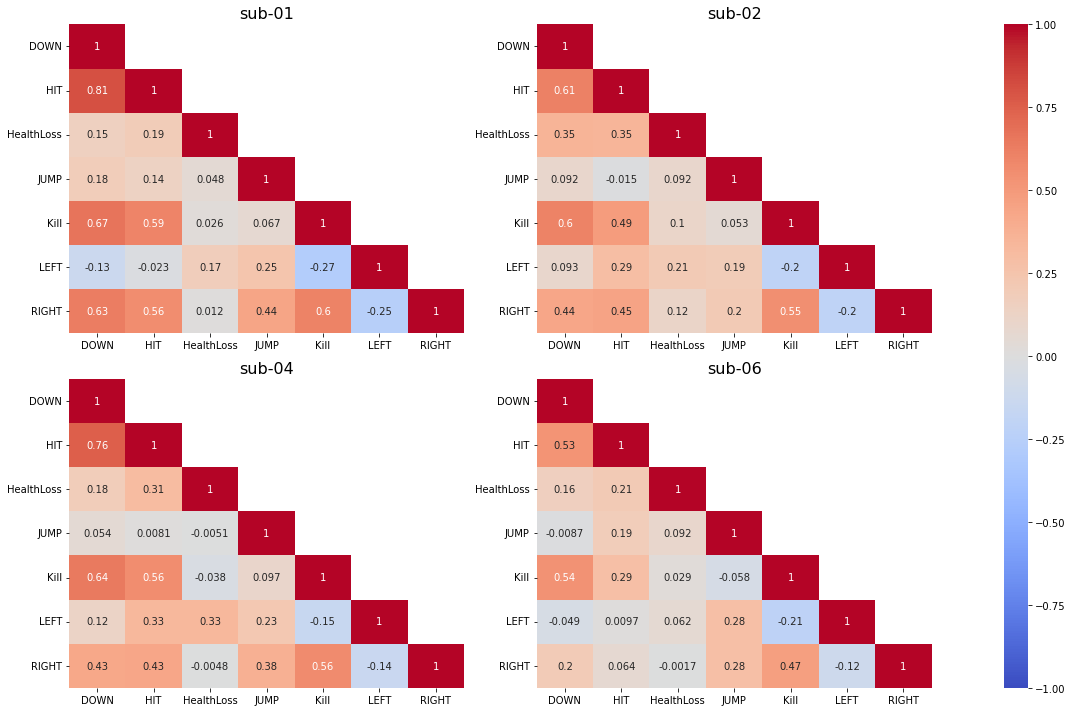

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

fig = plt.figure(figsize=(20, 15), dpi=300)
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.06])

ax_cbar = fig.add_subplot(gs[:,-1])
ax_cbar.tick_params(labelsize=14)

axes = np.array([[fig.add_subplot(gs[row, col]) for col in range(gs._ncols-1)] for row in range(gs._nrows)]).ravel()
#ax_cbar.set_label('R')
for subj_idx, subject in enumerate(np.unique(df.subject)):
    subj_df = df[df.subject == subject].drop('subject', axis=1)
    data_to_plot = subj_df.values.mean()

    mask = np.ones_like(data_to_plot, dtype=bool)
    mask[np.tril_indices_from(mask)] = False
    sns.heatmap(data_to_plot, vmin=-1, vmax=1, annot=True,
                ax=axes[subj_idx], cbar=True, cbar_ax=ax_cbar, 
                cmap='coolwarm', annot_kws={"fontsize": 14},
                xticklabels=columns, yticklabels=columns, mask=mask)
    axes[subj_idx].set_title(f'{subject}', fontsize=18)
    # Set font size and rotation for xticklabels
    plt.setp(axes[subj_idx].get_xticklabels(), rotation=45, ha='right', fontsize=14)

    # Set font size for yticklabels
    plt.setp(axes[subj_idx].get_yticklabels(), fontsize=14)
    

plt.tight_layout()

## Plot example design matrices

<Axes: label='conditions', ylabel='scan number'>

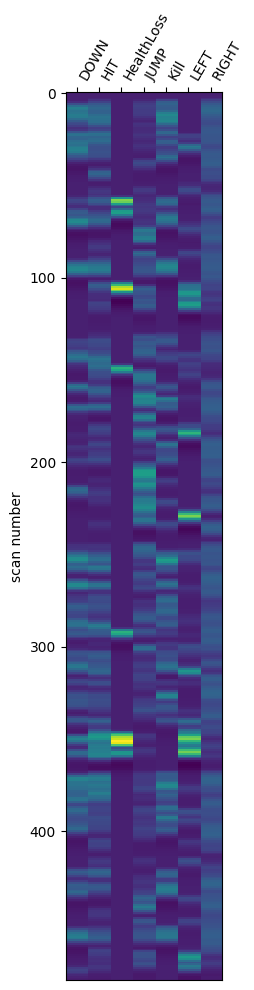

In [4]:
from nilearn import plotting
# Take a random file
fmri_file = '/home/hyruuk/GitHub/neuromod/shinobi/sub-04/ses-005/func/sub-04_ses-005_task-shinobi_run-01_bold.nii.gz'

# Dummy design matrix to show the convolved regressors
design_matrix = get_clean_matrix(fmri_file)
design_matrix = design_matrix[columns_list]

# Plot the design matrix
plotting.plot_design_matrix(design_matrix)

/home/hyruuk/mambaforge/envs/shinobi2/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


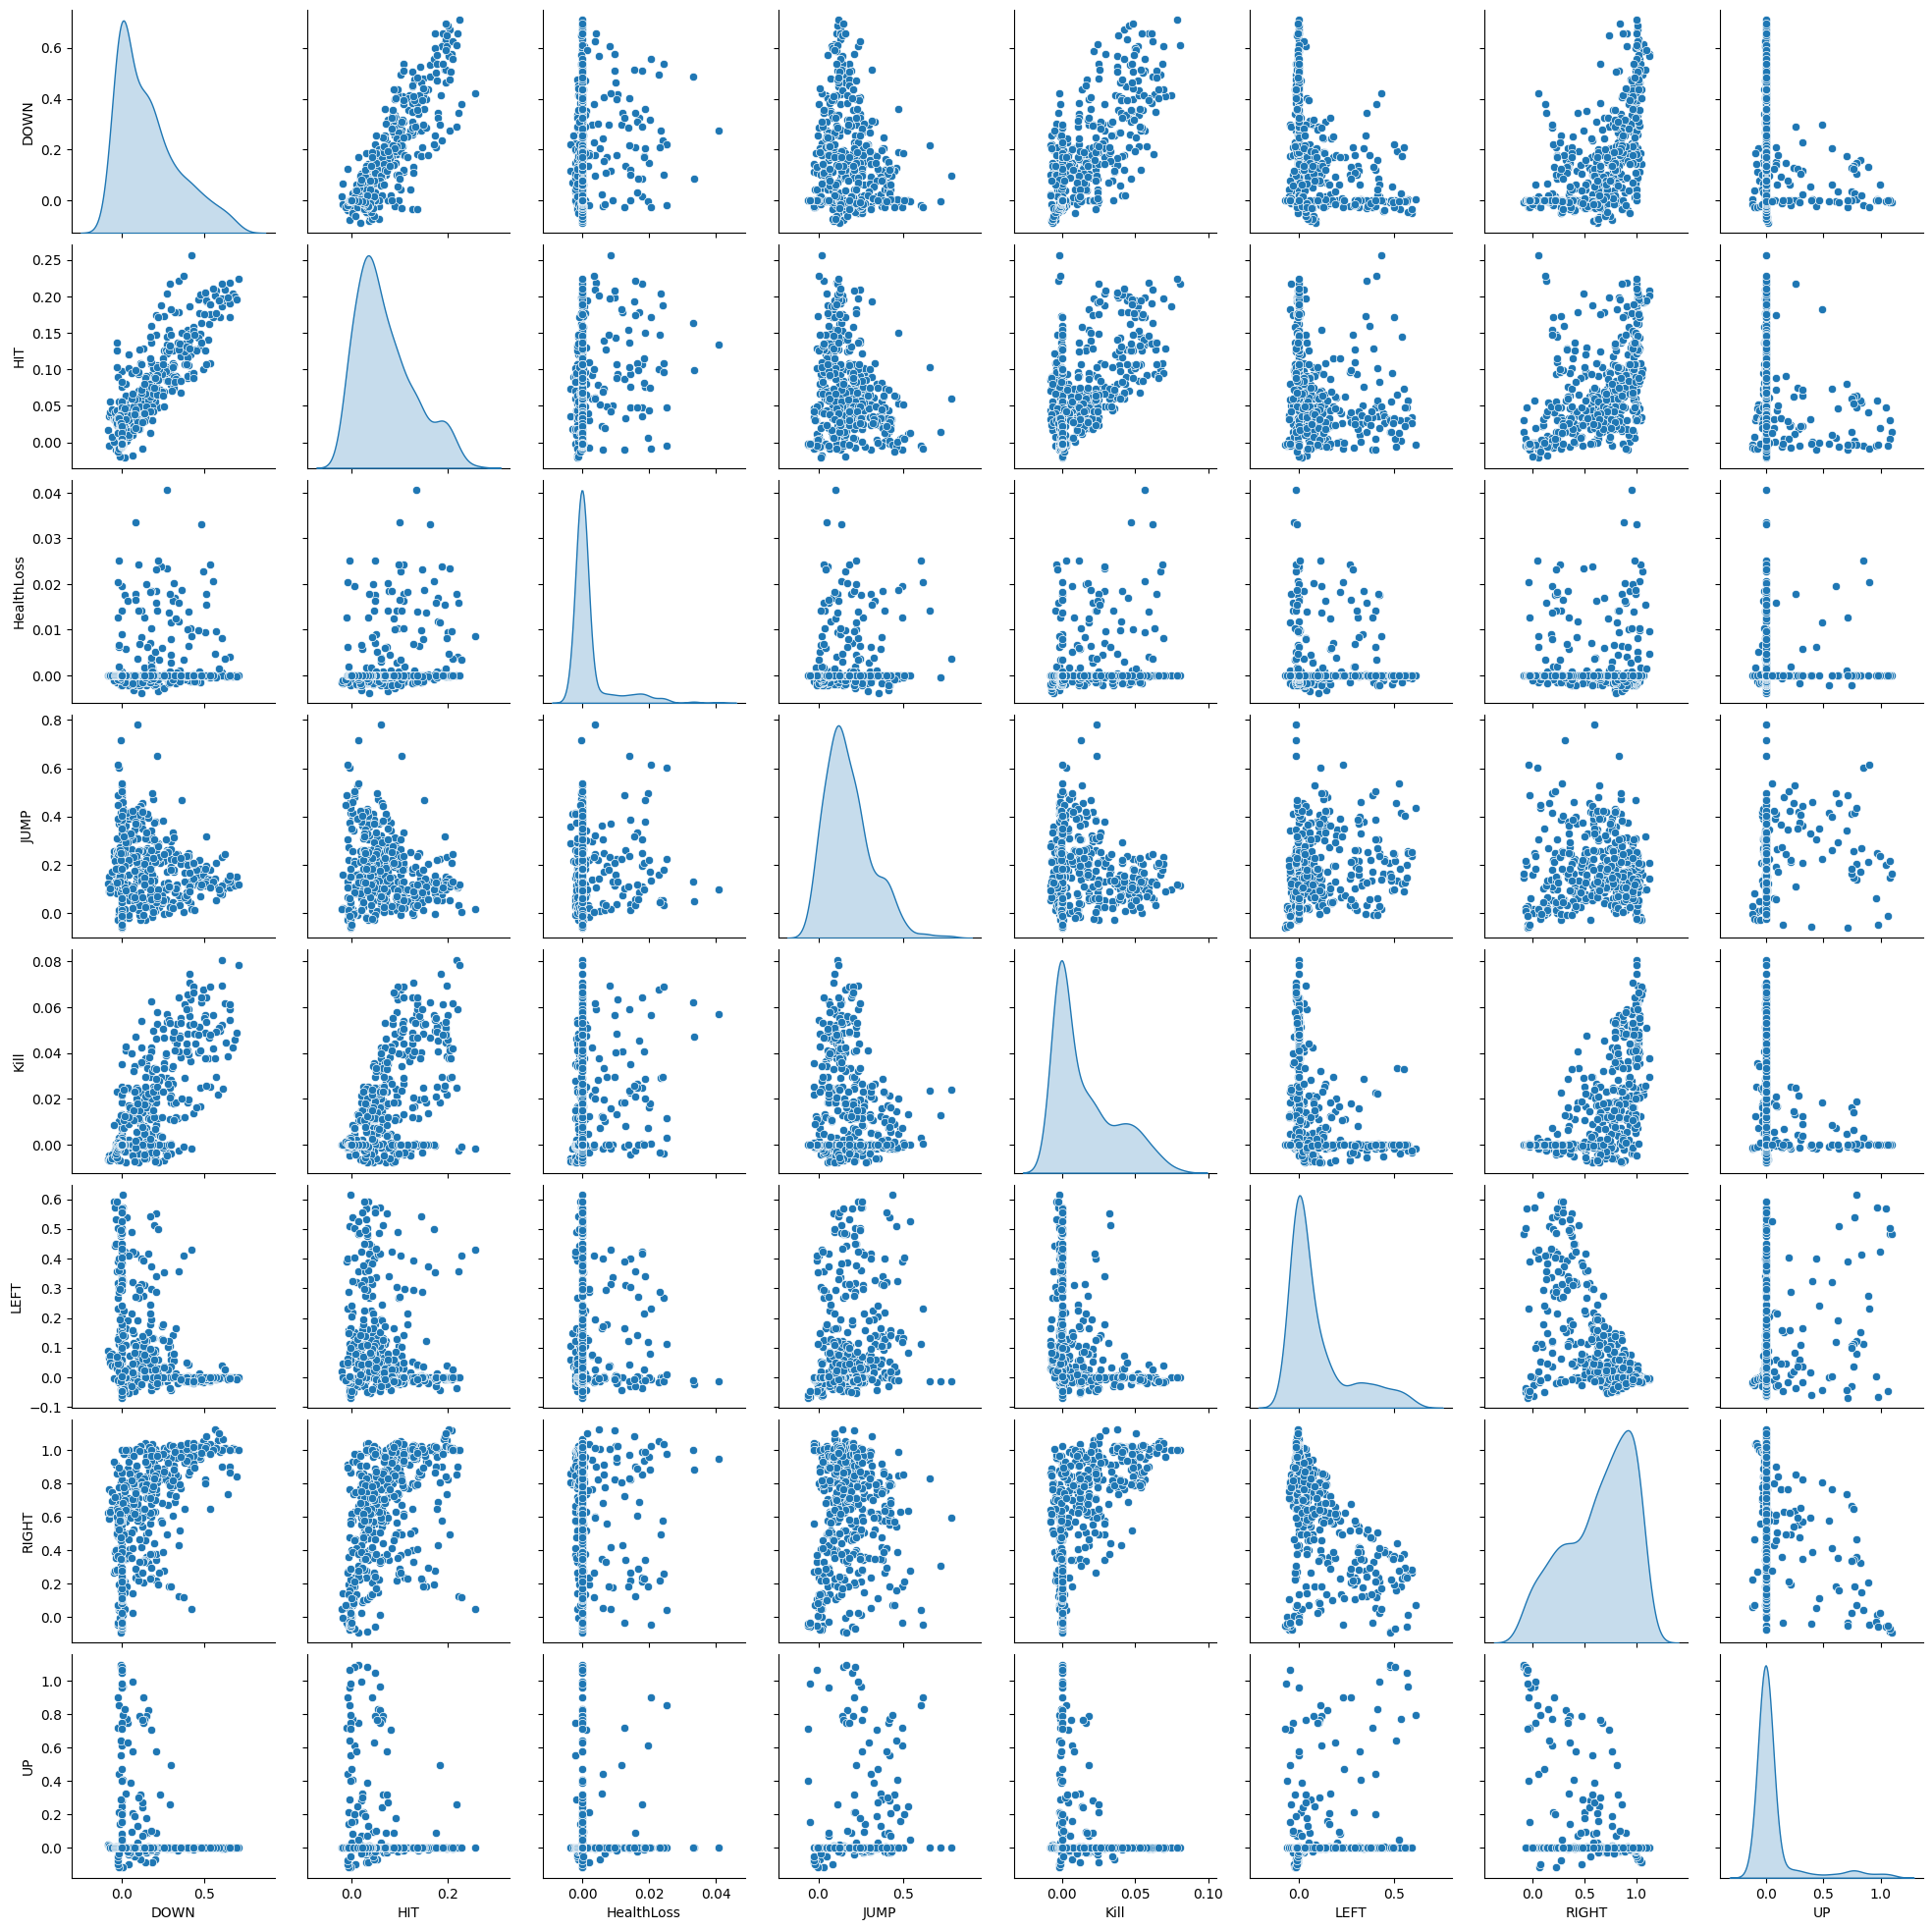

In [7]:
import seaborn as sns
# Random pairplot
sns.pairplot(data=design_matrix, diag_kind='kde')

In [106]:
fmri_files

['/home/hyruuk/GitHub/neuromod/shinobi/sub-04/ses-005/func/sub-04_ses-005_task-shinobi_run-01_bold.nii.gz',
 '/home/hyruuk/GitHub/neuromod/shinobi/sub-04/ses-005/func/sub-04_ses-005_task-shinobi_run-04_bold.nii.gz',
 '/home/hyruuk/GitHub/neuromod/shinobi/sub-04/ses-005/func/sub-04_ses-005_task-shinobi_run-02_bold.nii.gz',
 '/home/hyruuk/GitHub/neuromod/shinobi/sub-04/ses-005/func/sub-04_ses-005_task-shinobi_run-05_bold.nii.gz',
 '/home/hyruuk/GitHub/neuromod/shinobi/sub-04/ses-005/func/sub-04_ses-005_task-shinobi_run-03_bold.nii.gz',
 '/home/hyruuk/GitHub/neuromod/shinobi/sub-04/ses-002/func/sub-04_ses-002_task-shinobi_run-05_bold.nii.gz',
 '/home/hyruuk/GitHub/neuromod/shinobi/sub-04/ses-002/func/sub-04_ses-002_task-shinobi_run-04_bold.nii.gz',
 '/home/hyruuk/GitHub/neuromod/shinobi/sub-04/ses-002/func/sub-04_ses-002_task-shinobi_run-01_bold.nii.gz',
 '/home/hyruuk/GitHub/neuromod/shinobi/sub-04/ses-002/func/sub-04_ses-002_task-shinobi_run-02_bold.nii.gz',
 '/home/hyruuk/GitHub/neurom

# Descriptive DF (annotations)

In [5]:
# load the data
fmri_datapath = '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/'
events_file_list = glob(op.join(fmri_datapath, 'shinobi', 'sub*', 'ses*', 'func', '*desc-annotated_events.tsv'))
events_file_list

['/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/shinobi/sub-06/ses-012/func/sub-06_ses-012_task-shinobi_run-04_desc-annotated_events.tsv',
 '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/shinobi/sub-06/ses-012/func/sub-06_ses-012_task-shinobi_run-01_desc-annotated_events.tsv',
 '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/shinobi/sub-06/ses-012/func/sub-06_ses-012_task-shinobi_run-03_desc-annotated_events.tsv',
 '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/shinobi/sub-06/ses-012/func/sub-06_ses-012_task-shinobi_run-02_desc-annotated_events.tsv',
 '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/shinobi/sub-06/ses-007/func/sub-06_ses-007_task-shinobi_run-04_desc-annotated_events.tsv',
 '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/shinobi/sub-06/ses-007/func/sub-06_ses-007_task-shinobi_run-03_desc-annotated_events.tsv',
 '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/shinobi/sub-06/ses-007/func/sub-06_ses-007_task-shinobi_run-02_desc-annotated_events.tsv',
 '/home/hyruuk/GitHu

In [6]:
events_df_list = []
for events_file in events_file_list:
    events_df = pd.read_csv(events_file, sep='\t').drop('Unnamed: 0', axis=1)
    events_df = events_df[events_df['trial_type'] != 'gym-retro_game'].drop(['duration_bk2', 'onset', 'stim_file'], axis=1)
    events_df['subject'] = events_file.split('/')[-1].split('_')[0]
    events_df['session'] = events_file.split('/')[-1].split('_')[1]
    events_df['run'] = events_file.split('/')[-1].split('_')[3]
    events_df['subject/session'] = events_df['subject'] + '_' + events_df['session']
    events_df_list.append(events_df)
events_df = pd.concat(events_df_list)
events_df


,trial_type,duration,level,subject,session,run,subject/session
1,RIGHT,0.150,level-1,sub-06,ses-012,run-04,sub-06_ses-012
2,RIGHT,0.117,level-1,sub-06,ses-012,run-04,sub-06_ses-012
3,RIGHT,1.033,level-1,sub-06,ses-012,run-04,sub-06_ses-012
4,DOWN,0.816,level-1,sub-06,ses-012,run-04,sub-06_ses-012
5,HIT,0.150,level-1,sub-06,ses-012,run-04,sub-06_ses-012
...,...,...,...,...,...,...,...
930,LEFT,3.800,level-1,sub-02,ses-002,run-05,sub-02_ses-002
931,HIT,0.583,level-1,sub-02,ses-002,run-05,sub-02_ses-002
932,JUMP,0.150,level-1,sub-02,ses-002,run-05,sub-02_ses-002
933,JUMP,0.217,level-1,sub-02,ses-002,run-05,sub-02_ses-002


In [20]:
events_df.to_csv('../data/S4b_annotations_durations.csv', index=False)

# Rows : annotations
# Columns : Count per session (average) ; Duration (average) ; Duration (STD) : Duration (min) ; Duration (max)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_descriptive_table(events_df):
    # Drop HealthGain and A
    events_df = events_df[events_df['trial_type'] != 'HealthGain']
    events_df = events_df[events_df['trial_type'] != 'A']
    
    # Compute count per session
    count_per_session = events_df.groupby(["trial_type", "subject/session"]).size().groupby("trial_type").mean()

    # Compute duration statistics per session
    duration_stats = events_df.groupby(["trial_type", "subject/session"])['duration'].agg(["mean", "std", "min", "max"])
    duration_quantiles = events_df.groupby(["trial_type", "subject/session"])['duration'].quantile([0.25, 0.75]).unstack()

    # Merge statistics
    duration_stats = pd.concat([duration_stats, duration_quantiles], axis=1)
    duration_stats.columns = ["mean", "std", "min", "max", "25%", "75%"]

    # Compute session-wise averages
    duration_summary = duration_stats.groupby(level=0).mean()

    # Create hierarchical column index
    columns = pd.MultiIndex.from_tuples(
        [("Count per session", "Average")] + [("Duration", stat) for stat in ["Average", "STD", "25%", "75%"]],
        names=["Metric", "Statistic"]
    )

    # Combine results into a single DataFrame
    summary_table = pd.DataFrame(
        data={
            ("Count per session", "Average"): count_per_session.round(3),
            ("Duration", "Average"): duration_summary["mean"].round(3),
            ("Duration", "STD"): duration_summary["std"].round(3),
            ("Duration", "25%" ): duration_summary["25%"].round(3),
            ("Duration", "75%" ): duration_summary["75%"].round(3)
        }
    )

    # Apply the hierarchical column names
    summary_table.columns = columns
    
    # Reorder rows
    ordered_index = ["RIGHT", "LEFT", "DOWN", "UP", "JUMP", "HIT", "Kill", "HealthLoss"]
    summary_table = summary_table.reindex(ordered_index)

    # Replace Duration values for 'Kill' and 'HealthLoss' with N/A
    for stat in ["Average", "STD", "25%", "75%"]:
        summary_table.loc[["Kill", "HealthLoss"], ("Duration", stat)] = "N/A"
    
    return summary_table

In [8]:
summary_table = generate_descriptive_table(events_df)
summary_table

/tmp/ipykernel_71455/1280539932.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summary_table.loc[["Kill", "HealthLoss"], ("Duration", stat)] = "N/A"
/tmp/ipykernel_71455/1280539932.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summary_table.loc[["Kill", "HealthLoss"], ("Duration", stat)] = "N/A"
/tmp/ipykernel_71455/1280539932.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summary_table.loc[["Kill", "HealthLoss"], ("Duration", stat)] = "N/A

Metric     Count per session Duration                     
Statistic            Average  Average    STD    25%    75%
trial_type                                                
RIGHT               1163.783    1.268  1.638  0.137  1.712
LEFT                 281.783    0.678  0.678  0.212  0.913
DOWN                 510.130     0.84  0.684  0.405  1.053
UP                   142.391    1.104  1.115  0.406   1.39
JUMP                1040.565    0.373  0.243  0.207  0.481
HIT                 1165.783    0.256  0.142  0.172  0.307
Kill                 406.630      N/A    N/A    N/A    N/A
HealthLoss            48.848      N/A    N/A    N/A    N/A

In [9]:
# Drop events A and HealthGain
events_df = events_df[events_df['trial_type'] != 'A']
events_df = events_df[events_df['trial_type'] != 'HealthGain']

# Count per session
counts_per_session = events_df.groupby(["trial_type", "subject/session"])['duration'].count().reset_index(drop=False)
counts_per_session

# Duration (average per session)
duration_per_session = events_df.groupby(["trial_type", "subject/session"])['duration'].mean().reset_index(drop=False)
duration_per_session

,trial_type,subject/session,duration
0,DOWN,sub-01_ses-002,0.632355
1,DOWN,sub-01_ses-003,0.666493
2,DOWN,sub-01_ses-004,0.653834
3,DOWN,sub-01_ses-005,0.630799
4,DOWN,sub-01_ses-006,0.644373
...,...,...,...
363,UP,sub-06_ses-008,0.742628
364,UP,sub-06_ses-010,0.776848
365,UP,sub-06_ses-011,0.745939
366,UP,sub-06_ses-012,0.825966


In [36]:
counts_per_session

,trial_type,subject/session,duration
0,DOWN,sub-01_ses-002,538
1,DOWN,sub-01_ses-003,546
2,DOWN,sub-01_ses-004,644
3,DOWN,sub-01_ses-005,626
4,DOWN,sub-01_ses-006,737
...,...,...,...
363,UP,sub-06_ses-008,172
364,UP,sub-06_ses-010,244
365,UP,sub-06_ses-011,164
366,UP,sub-06_ses-012,205


In [10]:
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt

order = ['RIGHT', 'LEFT', 'DOWN', 'UP', 'JUMP', 'HIT', 'Kill', 'HealthLoss']
palette = sns.color_palette("Set2", n_colors=2)



fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)
ax2 = ax1.twiny()



pt.RainCloud(data=counts_per_session, x='trial_type', y='duration', 
             alpha=0.5, order=order, width_viol=2, orient='h', ax=ax1,
             palette=[palette[0]])
pt.RainCloud(data=duration_per_session, x='trial_type', y='duration', 
             alpha=0.5, order=order, width_viol=2, orient='h', ax=ax2,
             palette=[palette[1]])

ImportError: cannot import name '_CategoricalScatterPlotter' from 'seaborn.categorical' (/home/hyruuk/mambaforge/envs/shinobi_env/lib/python3.10/site-packages/seaborn/categorical.py)

    subject/session  trial_type  count
0    sub-01_ses-002        DOWN    538
1    sub-01_ses-002         HIT    859
2    sub-01_ses-002  HealthLoss     32
3    sub-01_ses-002        JUMP    988
4    sub-01_ses-002        Kill    313
..              ...         ...    ...
363  sub-06_ses-013        JUMP   1219
364  sub-06_ses-013        Kill    332
365  sub-06_ses-013        LEFT    301
366  sub-06_ses-013       RIGHT   1261
367  sub-06_ses-013          UP    282

[368 rows x 3 columns]


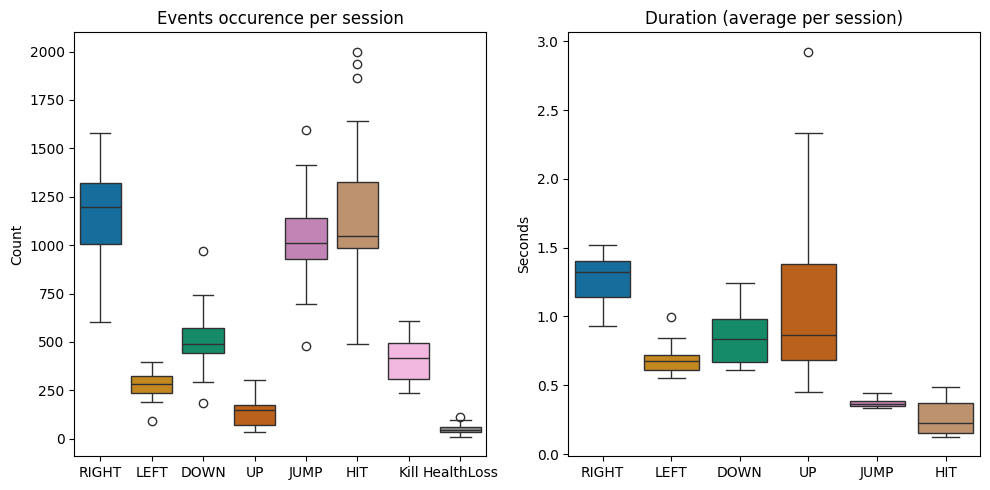

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_barplot(events_df):
    # Compute duration mean per session
    duration_per_session = events_df.groupby(["subject/session", "trial_type"])['duration'].mean().reset_index()
    # Drop Kill and HealthLoss
    duration_per_session = duration_per_session[~duration_per_session['trial_type'].isin(['Kill', 'HealthLoss'])]
    
    # Compute count per session
    count_per_session = events_df.groupby(["subject/session", "trial_type"]).size().reset_index(name='count')
    
    # Merge both datasets
    merged_df = duration_per_session.merge(count_per_session, on=["subject/session", "trial_type"])
    
    # Sort trial types in specified order
    order = ['RIGHT', 'LEFT', 'DOWN', 'UP', 'JUMP', 'HIT', 'Kill', 'HealthLoss']
    order_duration = ['RIGHT', 'LEFT', 'DOWN', 'UP', 'JUMP', 'HIT']
    
    # Define a fixed color mapping
    unique_trial_types = ['RIGHT', 'LEFT', 'DOWN', 'UP', 'JUMP', 'HIT', 'Kill', 'HealthLoss']
    color_palette = sns.color_palette("colorblind", n_colors=len(unique_trial_types))
    color_mapping = {trial: color for trial, color in zip(unique_trial_types, color_palette)}

    # Initialize figure
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Barplot for count (left)
    sns.boxplot(y="count", x="trial_type", data=count_per_session, ax=ax[0], 
                order=order, palette=color_mapping, hue="trial_type", legend=False)
    ax[0].set_title("Events occurence per session")
    ax[0].set_xlabel("")
    ax[0].set_ylabel("Count")
    
    # Barplot for duration (right)
    sns.boxplot(y="duration", x="trial_type", data=duration_per_session, ax=ax[1], 
                order=order_duration, palette=color_mapping, hue="trial_type", legend=False)
    ax[1].set_title("Duration (average per session)")
    ax[1].set_xlabel("")
    ax[1].set_ylabel("Seconds")

    plt.tight_layout()
    plt.show()

# Example usage:
plot_barplot(events_df)


In [5]:
events_df = events_df[events_df['trial_type'].isin(['JUMP', 'HIT', 'Kill', 'HealthLoss', 'DOWN', 'LEFT', 'RIGHT'])]
desc = events_df.groupby(['trial_type', 'subject']).describe()[[
    ('duration', 'count'),
    ('duration', 'mean'),
    ('duration', 'std'),
    ('duration', '25%'),
    ('duration', '50%'),
    ('duration', '75%'),
]]
desc[('duration', 'count')] = desc[('duration', 'count')].astype(int)
desc

duration                                             
                      count      mean           std    25%    50%    75%
trial_type subject                                                      
DOWN       sub-01      8027  0.653786  4.581990e-01  0.333  0.516  0.867
           sub-02      5175  1.024912  9.248292e-01  0.450  0.800  1.300
           sub-04      5547  0.954023  8.092355e-01  0.467  0.733  1.158
           sub-06      4717  0.723260  5.525361e-01  0.367  0.550  0.900
HIT        sub-01     13526  0.166438  1.044565e-01  0.134  0.166  0.183
           sub-02     11572  0.439029  2.754089e-01  0.233  0.384  0.583
           sub-04     11136  0.268115  1.295375e-01  0.200  0.234  0.283
           sub-06     17392  0.139066  1.637899e-01  0.100  0.133  0.166
HealthLoss sub-01       460  0.100000  0.000000e+00  0.100  0.100  0.100
           sub-02       851  0.100000  0.000000e+00  0.100  0.100  0.100
           sub-04       637  0.100000  2.777739e-17  0.100  0.100  0.100
           sub-06       299  0.100000  1.390105e-17  0.100  0.100  0.100
JUMP       sub-01     13889  0.359283  2.063044e-01  0.217  0.333  0.483
           sub-02     12357  0.372977  3.124362e-01  0.200  0.300  0.433
           sub-04     10606  0.401181  2.226797e-01  0.250  0.333  0.483
           sub-06     11014  0.356474  2.496609e-01  0.150  0.283  0.550
Kill       sub-01      4829  0.100000  1.387922e-17  0.100  0.100  0.100
           sub-02      5549  0.100000  2.775808e-17  0.100  0.100  0.100
           sub-04      5323  0.100000  1.387909e-17  0.100  0.100  0.100
           sub-06      3004  0.100000  1.388010e-17  0.100  0.100  0.100
LEFT       sub-01      3792  0.699202  6.497582e-01  0.234  0.500  0.984
           sub-02      2971  0.750371  8.294781e-01  0.184  0.450  1.000
           sub-04      3243  0.631366  6.904446e-01  0.200  0.400  0.800
           sub-06      2956  0.593252  5.122986e-01  0.217  0.450  0.767
RIGHT      sub-01     13927  1.396730  2.251161e+00  0.100  0.517  1.784
           sub-02     14002  1.398190  1.773883e+00  0.084  0.950  1.900
           sub-04     14482  1.219082  1.361060e+00  0.150  0.867  1.700
           sub-06     11123  1.008923  1.078343e+00  0.217  0.650  1.417

In [ ]:
events_df.to_csv('../data/S4_dataset_events_description.csv', index=False)

In [1]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /home/hyruuk/mambaforge/envs/shinobi_env/lib/python3.10/site-packages
Requires: matplotlib, numpy, pandas
Required-by: biotuner, pingouin, ptitprince
